# Average with mean sales per month ensemble

Let's first plot the sales per month in the 2 years, and see if in different years in average the shops all together sell the same amount of stuff. Also, it is necessary to understand whether most of the shop behave in the same way, outliers shops which could sell a lot one month and next year in the same month they sell much less could be problematic in this type of ensemble given our error function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
dataset = pd.read_csv('./dataset/preprocessed0_date_train.csv')

In [2]:
#dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
#dataset['D_Month'] =  dataset['Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').month)

In [3]:
print(dataset.D_Month.unique())

[ 3  4  5  6  7  8  9 10 11 12  1  2]


In [4]:
#dataset.sort_values(by='Date')
#dataset.sort_values(['StoreID', 'Date'])  sorting by date dows not work

Getting first 12 months

In [5]:
first=dataset.loc[((dataset['D_Month'] >= 3) & (dataset['D_Year'] == 2016)) |\
                  ((dataset['D_Month'] < 3) & (dataset['D_Year'] == 2017))]

In [6]:
second = dataset.loc[((dataset['D_Month'] >= 3) & (dataset['D_Year'] == 2017)) |\
                  ((dataset['D_Month'] < 3) & (dataset['D_Year'] == 2018))]

In [7]:
dataset.shape

(523021, 40)

In [8]:
first.shape

(272636, 40)

In [9]:
second.shape

(250385, 40)

In [10]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
firstbymonth = first.groupby('D_Month').agg(aggregation_dict)
firstbymonth = firstbymonth.reset_index()
firstbymonth.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)

In [11]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
secondbymonth = second.groupby('D_Month').agg(aggregation_dict)
secondbymonth = secondbymonth.reset_index()
secondbymonth.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)

Same normalization I did on week has to be applied here

In [12]:
firstbymonth

,D_Month,NumberOfSales,NumberOfCustomers,StoreID
0,1,86136904,5538571,23219
1,2,84376836,5442662,20972
2,3,97388599,6178965,22470
3,4,82045477,5465175,22470
4,5,86880572,5618039,23219
5,6,89954151,5842857,22470
6,7,91060441,5883092,23219
7,8,97849526,6276168,23219
8,9,88829457,5831557,22470
9,10,86026240,5644232,23219


In [13]:
secondbymonth

,D_Month,NumberOfSales,NumberOfCustomers,StoreID
0,1,90594142,5633577,22844
1,2,85169759,5348447,20972
2,3,91610754,6000001,23219
3,4,85759494,5481432,22470
4,5,98267775,6205425,23219
5,6,88219584,5592930,22470
6,7,80106109,5133068,19719
7,8,81388045,5273644,19344
8,9,74374393,4961224,18720
9,10,76627984,4985677,19344


In [14]:
firstbymonth['Sales_per_store']=firstbymonth['NumberOfSales']/firstbymonth['StoreID']
firstbymonth.head(12)

,D_Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,86136904,5538571,23219,3709.759421
1,2,84376836,5442662,20972,4023.308983
2,3,97388599,6178965,22470,4334.161059
3,4,82045477,5465175,22470,3651.334090
4,5,86880572,5618039,23219,3741.787846
5,6,89954151,5842857,22470,4003.300000
6,7,91060441,5883092,23219,3921.807184
7,8,97849526,6276168,23219,4214.200698
8,9,88829457,5831557,22470,3953.246862
9,10,86026240,5644232,23219,3704.993324


In [15]:
secondbymonth['Sales_per_store']=secondbymonth['NumberOfSales']/secondbymonth['StoreID']
secondbymonth.head(12)

,D_Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,90594142,5633577,22844,3965.774033
1,2,85169759,5348447,20972,4061.117633
2,3,91610754,6000001,23219,3945.508161
3,4,85759494,5481432,22470,3816.621896
4,5,98267775,6205425,23219,4232.213920
5,6,88219584,5592930,22470,3926.105207
6,7,80106109,5133068,19719,4062.381916
7,8,81388045,5273644,19344,4207.405139
8,9,74374393,4961224,18720,3972.991079
9,10,76627984,4985677,19344,3961.330852


In [16]:
bothbymonth = pd.concat([firstbymonth,secondbymonth])

In [17]:
bothbymonth=bothbymonth.sort_values(by='D_Month')

In [18]:
bothbymonth

,D_Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,86136904,5538571,23219,3709.759421
0,1,90594142,5633577,22844,3965.774033
1,2,84376836,5442662,20972,4023.308983
1,2,85169759,5348447,20972,4061.117633
2,3,97388599,6178965,22470,4334.161059
2,3,91610754,6000001,23219,3945.508161
3,4,82045477,5465175,22470,3651.334090
3,4,85759494,5481432,22470,3816.621896
4,5,86880572,5618039,23219,3741.787846
4,5,98267775,6205425,23219,4232.213920


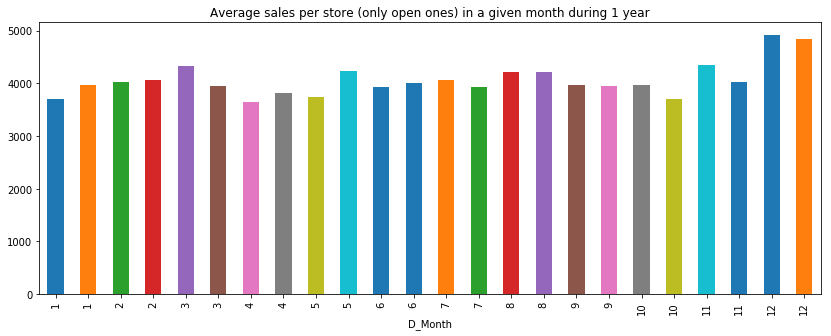

In [19]:
bothbymonth.plot('D_Month','Sales_per_store',figsize = (14,5),legend = 
                  False,title = 'Average sales per store (only open ones) in a given month during 1 year',kind='bar')
#data.plot('type', 'sale', kind='bar')

As we can notice most of the months behave in a similar way in the 2 years, what we have to assure is that every singular shop more or less behaves in a similar way, since out loss function's error derives from the differences in months real and predicted sales.
One way to do this would be to directly test the BIP error function on 2 months using for sales of each day of the store the average sales of the month divided by the days the shop is open, so that the sum by month becomes the as the one of the previous year

Let's take as our usual example january and february

In [20]:
import modify_dataset as md

In [21]:
features=['IsOpen','StoreID','D_Month','NumberOfSales',]

In [22]:
test2018 = md.get_fake_test(dataset) #jan feb 2018

In [23]:
#test2017 = md.get_fake_test4(dataset) #jan feb 2017
test2017= dataset.loc[((dataset['D_Month'] == 1) | (dataset['D_Month'] == 2)) & (dataset['D_Year'] == 2017)]
test2017 = test2017[features]

In [24]:
t2017 = test2017.groupby(['D_Month', 'StoreID']).sum()

Let's compute the sale per open day of a shop in a given month

In [25]:
t2017 = t2017.reset_index()
t2017['Sales_per_open_day']=t2017['NumberOfSales']/t2017['IsOpen']
t2017

,D_Month,StoreID,IsOpen,NumberOfSales,Sales_per_open_day
0,1,1000,25,185231,7409.240000
1,1,1001,25,66189,2647.560000
2,1,1002,25,114663,4586.520000
3,1,1003,25,126490,5059.600000
4,1,1004,24,95016,3959.000000
5,1,1005,25,117460,4698.400000
6,1,1006,25,145685,5827.400000
7,1,1007,25,94273,3770.920000
8,1,1008,25,163494,6539.760000
9,1,1009,25,127759,5110.360000


Now we just have to put the sale per open day of the correct month in every open day in the test2018 dataset and evaluate the BIP error

In [26]:
#let's try to put into store 1000 in month 1, then create a loop, this does not work
#test2018.loc[((test2018['D_Month'] == 1) & (test2018['StoreID'] == 1000) & (test2018['IsOpen'] == 1))]=['_NumberOfSales']=1

In [27]:
test2018.loc[(test2018.D_Month==1) & (test2018.StoreID==1000) & (test2018.IsOpen==1),'_NumberOfSales']=\
        t2017.loc[(t2017.StoreID==1000) & (t2017.D_Month==1)]['Sales_per_open_day'][0]
#df[ (df.A=='blue') & (df.B=='red') & (df.C=='square') ]['D'] = 'succeed'

C:\Users\Mirko\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mirko\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
#features.append('_NumberOfSales')
test2018[features][:10]

,IsOpen,StoreID,D_Month,NumberOfSales
670,1,1000,1,8540
671,1,1000,1,10364
672,1,1000,1,4676
673,0,1000,1,0
674,1,1000,1,6267
675,1,1000,1,5953
676,0,1000,1,0
677,1,1000,1,9075
678,1,1000,1,7856
679,1,1000,1,7423


Ok I'm finally able to perform the whole assignment

In [29]:
for store in range (1000,1749):
    test2018.loc[(test2018.D_Month==1) & (test2018.StoreID==store) & (test2018.IsOpen==1),'_NumberOfSales']=\
        t2017.loc[(t2017.StoreID==store) & (t2017.D_Month==1)]['Sales_per_open_day'][store-1000]
    

C:\Users\Mirko\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
for store in range (1000,1749):
    test2018.loc[(test2018.D_Month==2) & (test2018.StoreID==store) & (test2018.IsOpen==1),'_NumberOfSales']=\
        t2017.loc[(t2017.StoreID==store) & (t2017.D_Month==2)]['Sales_per_open_day'][store-251]

C:\Users\Mirko\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
test2018[100:110]

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,D_Day,D_DayOfYear,D_Month,D_Year,_NumberOfSales
1440,1001,11/02/2018,0,0,0,Super Market,With Non-Food Department,16755,0,0,...,1013,-2,6.0,0.00,318,11,42,2,2018,NaN
1441,1001,12/02/2018,0,1,0,Super Market,With Non-Food Department,16755,0,173,...,1018,-2,3.0,1.02,286,12,43,2,2018,2699.791667
1442,1001,13/02/2018,0,1,0,Super Market,With Non-Food Department,16755,0,168,...,1023,3,4.0,0.00,285,13,44,2,2018,2699.791667
1443,1001,14/02/2018,0,1,0,Super Market,With Non-Food Department,16755,0,172,...,1024,0,10.0,0.00,303,14,45,2,2018,2699.791667
1444,1001,15/02/2018,0,1,0,Super Market,With Non-Food Department,16755,0,196,...,1022,-5,0.0,0.00,157,15,46,2,2018,2699.791667
1445,1001,16/02/2018,0,1,0,Super Market,With Non-Food Department,16755,0,234,...,1015,-2,9.0,0.00,155,16,47,2,2018,2699.791667
1446,1001,17/02/2018,0,1,0,Super Market,With Non-Food Department,16755,0,197,...,1012,-1,6.0,0.00,153,17,48,2,2018,2699.791667
1447,1001,18/02/2018,0,0,0,Super Market,With Non-Food Department,16755,0,0,...,1013,-2,8.0,0.00,99,18,49,2,2018,NaN
1448,1001,19/02/2018,0,1,1,Super Market,With Non-Food Department,16755,0,248,...,1019,-2,2.0,0.00,76,19,50,2,2018,2699.791667
1449,1001,20/02/2018,0,1,1,Super Market,With Non-Food Department,16755,0,181,...,1023,-1,1.0,0.00,182,20,51,2,2018,2699.791667


## BIP Error

In [32]:
from BIP import get_BIP_error
error1 = get_BIP_error(test2018)

Number of regions identified: 11
BIP total error: 0.05346477095060351


In [33]:
#from BIP import get_BIP_error_isopenfiltered
#error2 = get_BIP_error_isopenfiltered(test2018)

Number of regions identified: 11
BIP total error: 0.05346477095060351


In [197]:
features.append('Region')


In [198]:
test2018[features]

,IsOpen,StoreID,D_Month,NumberOfSales,_NumberOfSales,Region
670,1,1000,1,8540,7409.240000,7
671,1,1000,1,10364,7409.240000,7
672,1,1000,1,4676,7409.240000,7
673,0,1000,1,0,0.000000,7
674,1,1000,1,6267,7409.240000,7
675,1,1000,1,5953,7409.240000,7
676,0,1000,1,0,0.000000,7
677,1,1000,1,9075,7409.240000,7
678,1,1000,1,7856,7409.240000,7
679,1,1000,1,7423,7409.240000,7


In [200]:
test2018[features].to_csv('./dataset/test_avg_prev_year.csv', index=False)